In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
from utils import log_mlflow, modelresults

In [3]:
import mlflow

mlflow.set_tracking_uri(uri="http://localhost:8080")
mlflow.set_experiment("PriceHubble assignment")

<Experiment: artifact_location='./mlruns/1', creation_time=1708487973280, experiment_id='1', last_update_time=1708487973280, lifecycle_stage='active', name='PriceHubble assignment', tags={}>

In [4]:
X_train = pd.read_parquet('X_train.parquet')
X_test = pd.read_parquet('X_test.parquet')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
rf = RandomForestRegressor(n_estimators=50, n_jobs=-1)
rf = rf.fit(X_train, y_train['sale_price'])

In [6]:
y_pred = rf.predict(X_test)

In [7]:
mae, mse, r2 = modelresults(y_test, y_pred)

Mean absolute error on model is 15578.2228

Mean squared error on model is 623029089.1080

The r2 score on model is 0.9227


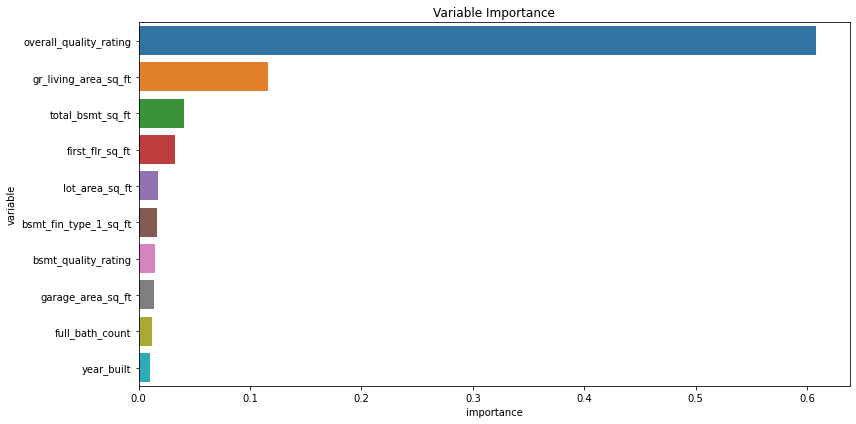

In [8]:
rankings = rf.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

fig = plt.figure(figsize=(12,6))
sns.barplot(x="importance",
            y="variable",
            data=importance.iloc[:10, :])
plt.title('Variable Importance')
plt.tight_layout()

In [9]:
log_mlflow(rf.get_params(), mae, mse, r2, fig, X_train, rf, run_name='RF_baseline', description='Random Forest Baseline')

/home/akshay/envs/topic_modeling/lib/python3.8/site-packages/mlflow/types/utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'RF_baseline' already exists. Creating a new version of this model...
2024/02/21 04:07:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model n